In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_curve, auc, accuracy_score
from sklearn import linear_model
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# Esta notebook es un primer boceto de lo que habría que hacer.
  Ojo con el nombre de las series que se me pudo haber escapado algo de los ejemplos.
  
  Tener en cuenta la creación de nuestras X e y. 
  
  En el modelo Naive Bayes Multinomial la mayoría de los ejemplos es con clasificador de texto.
  
  Ojo  con la estandarización de aplicarlo al set de entreamiento y llevar esa transformación al de testeo.

## Cargar el data set

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('df_ecobicis_final.csv')


In [4]:
df.sample(10)


,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,barrio_origen,comuna_origen,barrio_destino,comuna_destino,feriado,dia,uso_categorico,hora_simple,estacion_agno,rango_horario
1018419,1018419,494072,2018-06-29 07:52:11,10,F. J. Santamaría de Oro,125,Distrito Audiovisual,20,M,22,...,PALERMO,14,COLEGIALES,13,0,VIERNES,BAJO,7,INVIERNO,6-11
2524838,2524838,216420,2018-12-17 21:36:28,11,Acuña de Figueroa,54,Coronel Díaz,59,F,25,...,ALMAGRO,5,PALERMO,14,0,LUNES,BAJO,21,PRIMAVERA,18-23
746383,746383,513570,2018-05-28 13:35:44,20,Rincón,106,Acuña de Figueroa,54,M,31,...,BALVANERA,3,ALMAGRO,5,0,LUNES,MEDIO,13,OTOÑO,12-17
785677,785677,213963,2018-06-01 23:30:12,8,Gallo,154,Austria y French,200,F,27,...,BALVANERA,3,RECOLETA,2,0,VIERNES,BAJO,23,OTOÑO,18-23
1008875,1008875,67065,2018-06-28 11:35:50,15,Plaza Almagro,17,Ravignani,145,M,29,...,ALMAGRO,5,PALERMO,14,0,JUEVES,BAJO,11,INVIERNO,6-11
1236561,1236561,472840,2018-07-30 07:00:52,54,Hipolito Yrigoyen,167,Retiro III,131,M,42,...,ALMAGRO,5,RETIRO,1,0,LUNES,ALTO,7,INVIERNO,6-11
1697624,1697624,436798,2018-09-12 12:15:24,17,Virrey Cevallos,183,Lavalle,84,F,20,...,MONSERRAT,1,BALVANERA,3,0,MIERCOLES,BAJO,12,INVIERNO,12-17
853429,853429,508700,2018-06-10 14:43:06,21,Aduana,3,Aime Paine,151,F,28,...,MONSERRAT,1,PUERTO MADERO,1,0,DOMINGO,BAJO,14,OTOÑO,12-17
436548,436548,77183,2018-04-17 20:22:38,10,Corrientes,132,Marcelo T. de Alvear,135,M,71,...,SAN NICOLAS,1,RETIRO,1,0,MARTES,BAJO,20,OTOÑO,18-23
1855299,1855299,495525,2018-09-26 13:01:19,43,Estados Unidos,168,Legislatura,16,F,22,...,CONSTITUCION,1,MONSERRAT,1,0,MIERCOLES,ALTO,13,PRIMAVERA,12-17


## Revisar las columnas que tenemos para determinar las variables a usar, la creación de las varibales dummies y la eliminación de variables redundantes

In [5]:
df.columns

Index(['Unnamed: 0', 'bici_id_usuario', 'bici_Fecha_hora_retiro',
       'bici_tiempo_uso', 'bici_nombre_estacion_origen',
       'bici_estacion_origen', 'bici_nombre_estacion_destino',
       'bici_estacion_destino', 'bici_sexo', 'bici_edad', 'fecha', 'hora',
       'dia_semana', 'barrio_origen', 'comuna_origen', 'barrio_destino',
       'comuna_destino', 'feriado', 'dia', 'uso_categorico', 'hora_simple',
       'estacion_agno', 'rango_horario'],
      dtype='object')

In [6]:
#Revisando valores nulos
df.isnull().sum()

Unnamed: 0                      0
bici_id_usuario                 0
bici_Fecha_hora_retiro          0
bici_tiempo_uso                 0
bici_nombre_estacion_origen     0
bici_estacion_origen            0
bici_nombre_estacion_destino    0
bici_estacion_destino           0
bici_sexo                       0
bici_edad                       0
fecha                           0
hora                            0
dia_semana                      0
barrio_origen                   0
comuna_origen                   0
barrio_destino                  0
comuna_destino                  0
feriado                         0
dia                             0
uso_categorico                  0
hora_simple                     0
estacion_agno                   0
rango_horario                   0
dtype: int64

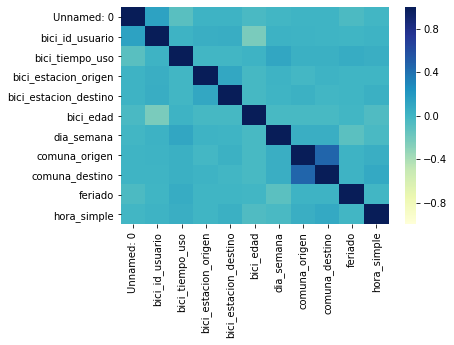

In [7]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap

sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

In [8]:
#Generando variables dummies
dummies_dia = pd.get_dummies(df.dia, prefix=None, prefix_sep='_', drop_first=True)
dummies_sexo=pd.get_dummies(df.bici_sexo, prefix=None, prefix_sep='_', drop_first=True)
dummies_origen=pd.get_dummies(df.bici_nombre_estacion_origen, prefix=None, prefix_sep='_', drop_first=True)
dummies_comuna=pd.get_dummies(df.comuna_origen, prefix='comuna', prefix_sep='_', drop_first=True)
dummies_estacion_agno=pd.get_dummies(df.estacion_agno, prefix=None, prefix_sep='_', drop_first=True)
dummies_rango=pd.get_dummies(df.rango_horario, prefix=None, prefix_sep='_', drop_first=True)


In [9]:
#Concatenamos los df de las dummies
df=pd.concat([df,dummies_sexo,dummies_dia,dummies_comuna,dummies_rango,dummies_origen,dummies_estacion_agno], axis=1)

In [10]:
df.head()

,Unnamed: 0,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,...,Velasco,Venezuela,Vera Peñaloza,Villarroel,Virrey Cevallos,Virrey Liniers,Yatay,OTOÑO,PRIMAVERA,VERANO
0,0,5453,2018-01-01 00:08:05,19,Uruguay,45,Virrey Cevallos,183,M,45,...,0,0,0,0,0,0,0,0,0,1
1,1,673,2018-01-01 00:18:05,26,Posadas,189,Guardia Vieja,110,M,61,...,0,0,0,0,0,0,0,0,0,1
2,2,179119,2018-01-01 00:20:14,27,Hospital Rivadavia,50,Padilla,31,F,52,...,0,0,0,0,0,0,0,0,0,1
3,3,400147,2018-01-01 00:20:22,48,Macacha Güemes,111,Acuña de Figueroa,54,M,27,...,0,0,0,0,0,0,0,0,0,1
4,4,400156,2018-01-01 00:20:31,49,Macacha Güemes,111,Acuña de Figueroa,54,F,27,...,0,0,0,0,0,0,0,0,0,1


In [11]:
#Dropear las features redundantes o que no necesitamos
df = df.drop(['barrio_destino'], axis=1)
df = df.drop(['barrio_origen'], axis=1)
df = df.drop(['bici_nombre_estacion_destino'], axis=1)
df = df.drop(['bici_nombre_estacion_origen'], axis=1)
df = df.drop(['dia'], axis=1)
df = df.drop(['Unnamed: 0'], axis=1)
df=df.drop(['bici_id_usuario'], axis=1)
df=df.drop(['bici_Fecha_hora_retiro'], axis=1)
df=df.drop(['bici_estacion_origen'], axis=1)
df=df.drop(['bici_estacion_destino'], axis=1)
df=df.drop(['fecha'], axis=1)
df=df.drop(['dia_semana'], axis=1)
df=df.drop(['bici_sexo'], axis=1)
df=df.drop(['comuna_destino'], axis=1)
df=df.drop(['hora'], axis=1)
df=df.drop(['estacion_agno'], axis=1)
df=df.drop(['rango_horario'], axis=1)
df=df.drop(['bici_tiempo_uso'], axis=1)


df.head()

,bici_edad,comuna_origen,feriado,uso_categorico,hora_simple,M,N,JUEVES,LUNES,MARTES,...,Velasco,Venezuela,Vera Peñaloza,Villarroel,Virrey Cevallos,Virrey Liniers,Yatay,OTOÑO,PRIMAVERA,VERANO
0,45,1,1,BAJO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,61,2,1,BAJO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,52,14,1,BAJO,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,27,1,1,MEDIO,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,27,1,1,MEDIO,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df.columns

Index(['bici_edad', 'comuna_origen', 'feriado', 'uso_categorico',
       'hora_simple', 'M', 'N', 'JUEVES', 'LUNES', 'MARTES',
       ...
       'Velasco', 'Venezuela', 'Vera Peñaloza', 'Villarroel',
       'Virrey Cevallos', 'Virrey Liniers', 'Yatay', 'OTOÑO', 'PRIMAVERA',
       'VERANO'],
      dtype='object', length=225)

In [14]:
# Para Entrenamiento
df_bajo_E = df.loc[(df['uso_categorico']=='BAJO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 5)
df_medio_E = df.loc[(df['uso_categorico']=='MEDIO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 15)
df_alto_E = df.loc[(df['uso_categorico']=='ALTO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 25)
df_excedido_E = df.loc[(df['uso_categorico']=='EXCEDIDO') & (df['uso_categorico'].index % 2 == 0),:].sample(25000, random_state= 35)

In [15]:
df_balance = pd.concat([df_bajo_E, df_medio_E, df_alto_E,  df_excedido_E])

In [21]:
y_train=df_balance['uso_categorico']

In [22]:
X_train=df_balance.drop(['uso_categorico'], axis=1)

In [23]:
df_test = df.loc[(df['uso_categorico'].index % 2 == 1),:].sample(200000, random_state= 5)

In [24]:
y_test=df_test['uso_categorico']

In [25]:
X_test=df_test.drop(['uso_categorico'], axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
model=RandomForestClassifier(random_state=0, n_jobs=8)

In [64]:
#parametros a tunear, aca hay otras opciones mañana me pongo a leer la documentacion y veo q mas se puede tunear
params={'n_estimators':[200,300],
        
       }

In [65]:
gs = GridSearchCV(model, params, cv=5, n_jobs=8)

In [66]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=8,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=8, param_grid={'n_estimators': [200,

In [71]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [72]:
pd.DataFrame(gs.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [73]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,226.666097,3.043097,654.812928,19.291168,200,{'n_estimators': 200},0.31095,0.31295,0.30575,0.31035,0.30675,0.30935,0.002692,1
1,300.813435,163.788040,268.014166,217.794097,300,{'n_estimators': 300},0.30950,0.31290,0.30690,0.30875,0.30740,0.30909,0.002119,2


In [74]:
#mejor resultado, el 0.3095 es la acuracy, muy mala
gs.best_estimator_, gs.best_score_, gs.best_params_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=8,
                        oob_score=False, random_state=0, verbose=0,
                        warm_start=False), 0.30935, {'n_estimators': 200})

In [27]:
dfc=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=224, n_jobs=8, oob_score=False,
                        random_state=0, verbose=0, warm_start=False)
dfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=224, n_jobs=8, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [28]:
y_pred=dfc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[  118  1603     5   435]
 [  679 39283    27  5125]
 [    5    68     1    16]
 [  326  9315     9  2985]]
              precision    recall  f1-score   support

        ALTO       0.10      0.05      0.07      2161
        BAJO       0.78      0.87      0.82     45114
    EXCEDIDO       0.02      0.01      0.02        90
       MEDIO       0.35      0.24      0.28     12635

    accuracy                           0.71     60000
   macro avg       0.31      0.29      0.30     60000
weighted avg       0.66      0.71      0.68     60000

0.70645


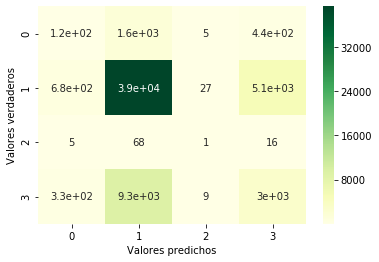

In [31]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap='YlGn')
plt.ylabel('Valores verdaderos')
plt.xlabel('Valores predichos');

In [31]:
y_test=df['uso_categorico'].sample(600000, random_state=15)
X_test=df.sample(600000, random_state=15)
X_test=X_test.drop(['uso_categorico'], axis=1)

In [32]:
X_test=sc.transform(X_test)
y_pred=dfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 40723      0    676   9197]
 [     0 373268      0    200]
 [   190      0  16624   5279]
 [   258     16    922 152647]]
              precision    recall  f1-score   support

        ALTO       0.99      0.80      0.89     50596
        BAJO       1.00      1.00      1.00    373468
    EXCEDIDO       0.91      0.75      0.82     22093
       MEDIO       0.91      0.99      0.95    153843

    accuracy                           0.97    600000
   macro avg       0.95      0.89      0.92    600000
weighted avg       0.97      0.97      0.97    600000

0.9721033333333333


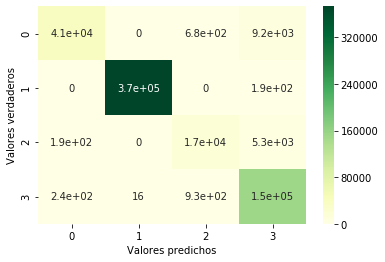

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,cmap='YlGn')
plt.ylabel('Valores verdaderos')
plt.xlabel('Valores predichos');